In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/membership-groceries-user-profile/membership_groceries_userprofile.csv


In [2]:
df = pd.read_csv('/kaggle/input/membership-groceries-user-profile/membership_groceries_userprofile.csv')

In [3]:
df

,id,gender,shared_account,membership_tier,membership_auto_renew,membership_fee,membership_start_date,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
0,1,Male,0,standard,1,188,2023/6/25,1,1,84.64,0,2,385.77,14,107
1,2,Female,0,standard,0,188,2019/4/14,1,1,83.78,1,3,126.74,14,149
2,3,Female,0,standard,0,188,2021/10/4,0,0,0.00,0,5,668.71,7,87
3,4,Male,0,standard,1,188,2023/11/22,0,1,51.31,1,2,194.62,12,67
4,5,Female,1,premium,1,388,2019/10/8,1,1,70.82,0,1,519.91,7,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,Female,0,standard,1,188,2024/3/30,0,0,0.00,1,3,446.56,12,0
854,855,Female,0,standard,1,188,2019/10/18,1,1,58.71,0,2,149.41,7,0
855,856,Male,1,standard,1,188,2024/4/9,0,0,0.00,1,3,482.99,10,101
856,857,Female,1,premium,1,388,2022/10/12,1,1,48.00,1,4,395.57,11,60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             858 non-null    int64  
 1   gender                         858 non-null    object 
 2   shared_account                 858 non-null    int64  
 3   membership_tier                858 non-null    object 
 4   membership_auto_renew          858 non-null    int64  
 5   membership_fee                 858 non-null    int64  
 6   membership_start_date          858 non-null    object 
 7   push_notification_enabled      858 non-null    int64  
 8   have_app                       858 non-null    int64  
 9   app_engagement_score           858 non-null    float64
 10  bought_store_brand             858 non-null    int64  
 11  promotion_participation_count  858 non-null    int64  
 12  average_basket_size            858 non-null    flo

In [5]:
df.describe()

,id,shared_account,membership_auto_renew,membership_fee,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,429.500000,0.224942,0.780886,270.284382,0.517483,0.748252,51.830897,0.493007,2.969697,436.723508,11.301865,92.835664
std,247.827561,0.417787,0.413887,98.475679,0.499986,0.434271,32.556343,0.500243,1.942947,283.632009,2.590895,46.959699
min,1.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000
25%,215.250000,0.000000,1.000000,188.000000,0.000000,0.000000,0.000000,0.000000,2.000000,258.162500,10.000000,59.000000
50%,429.500000,0.000000,1.000000,188.000000,1.000000,1.000000,62.965000,0.000000,3.000000,355.235000,11.000000,95.000000
75%,643.750000,0.000000,1.000000,388.000000,1.000000,1.000000,75.892500,1.000000,4.000000,534.317500,13.000000,126.750000
max,858.000000,1.000000,1.000000,388.000000,1.000000,1.000000,95.000000,1.000000,9.000000,1500.000000,18.000000,200.000000


# Vizaulization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns

Index(['id', 'gender', 'shared_account', 'membership_tier',
       'membership_auto_renew', 'membership_fee', 'membership_start_date',
       'push_notification_enabled', 'have_app', 'app_engagement_score',
       'bought_store_brand', 'promotion_participation_count',
       'average_basket_size', 'use_count', 'reward_points_used'],
      dtype='object')

In [8]:
cols = ['gender', 'shared_account', 'membership_tier',
       'membership_auto_renew', 'membership_fee', 
       'push_notification_enabled', 'have_app',
       'bought_store_brand', 'promotion_participation_count', 'use_count', 'reward_points_used']

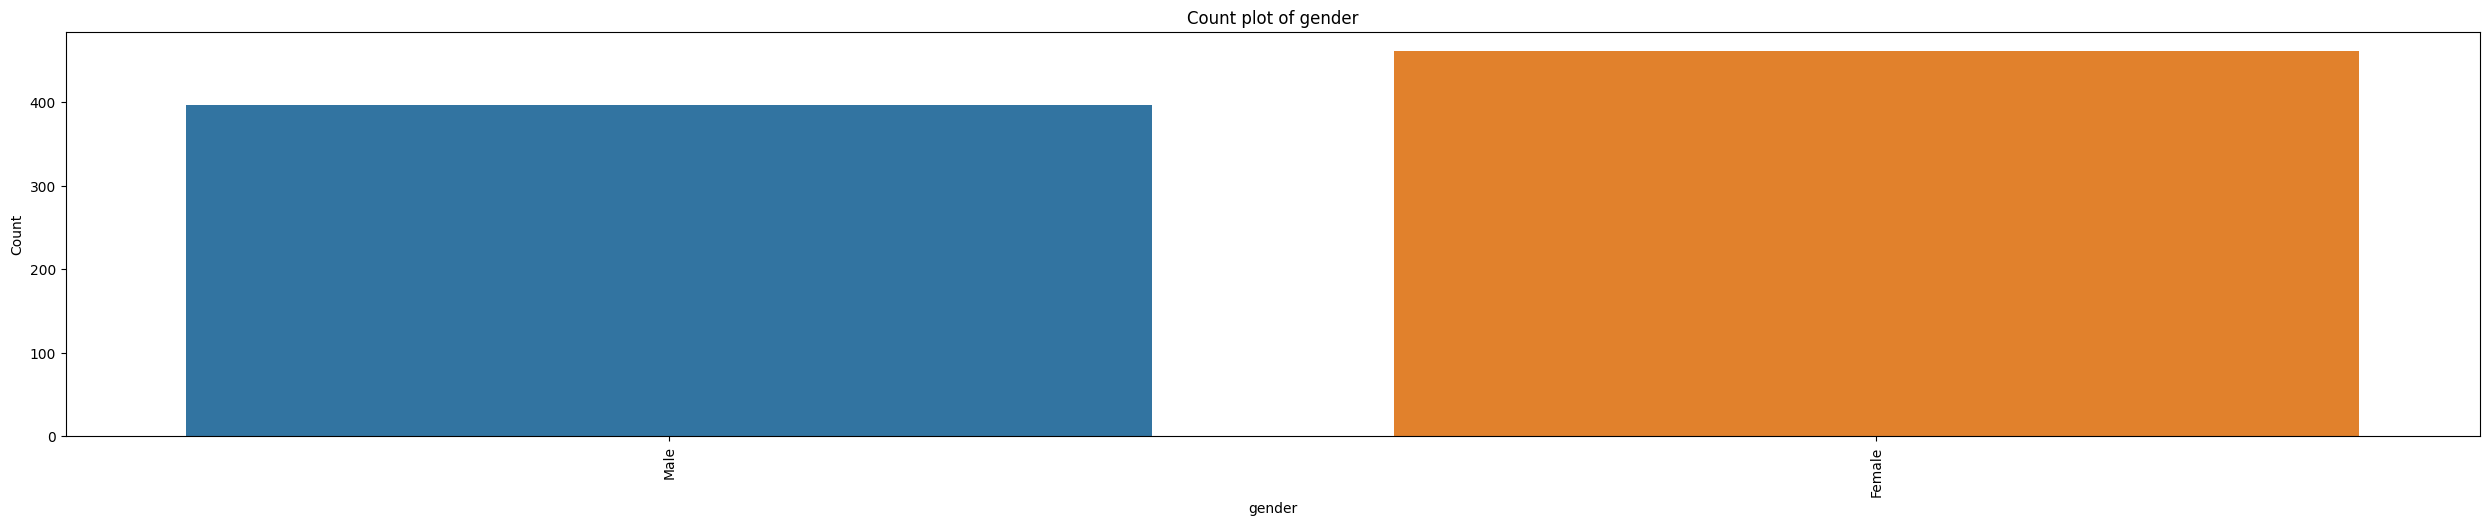

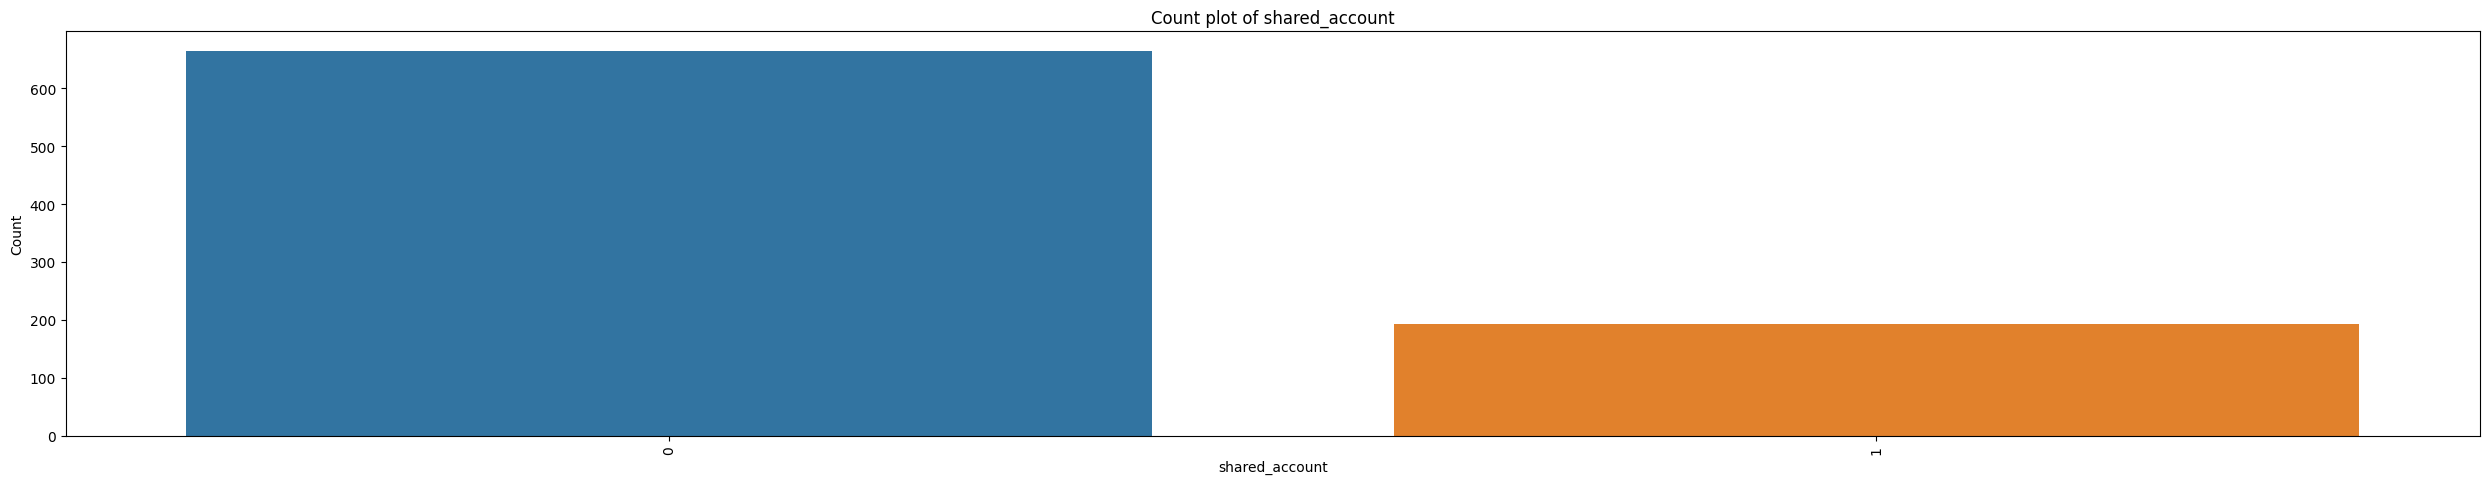

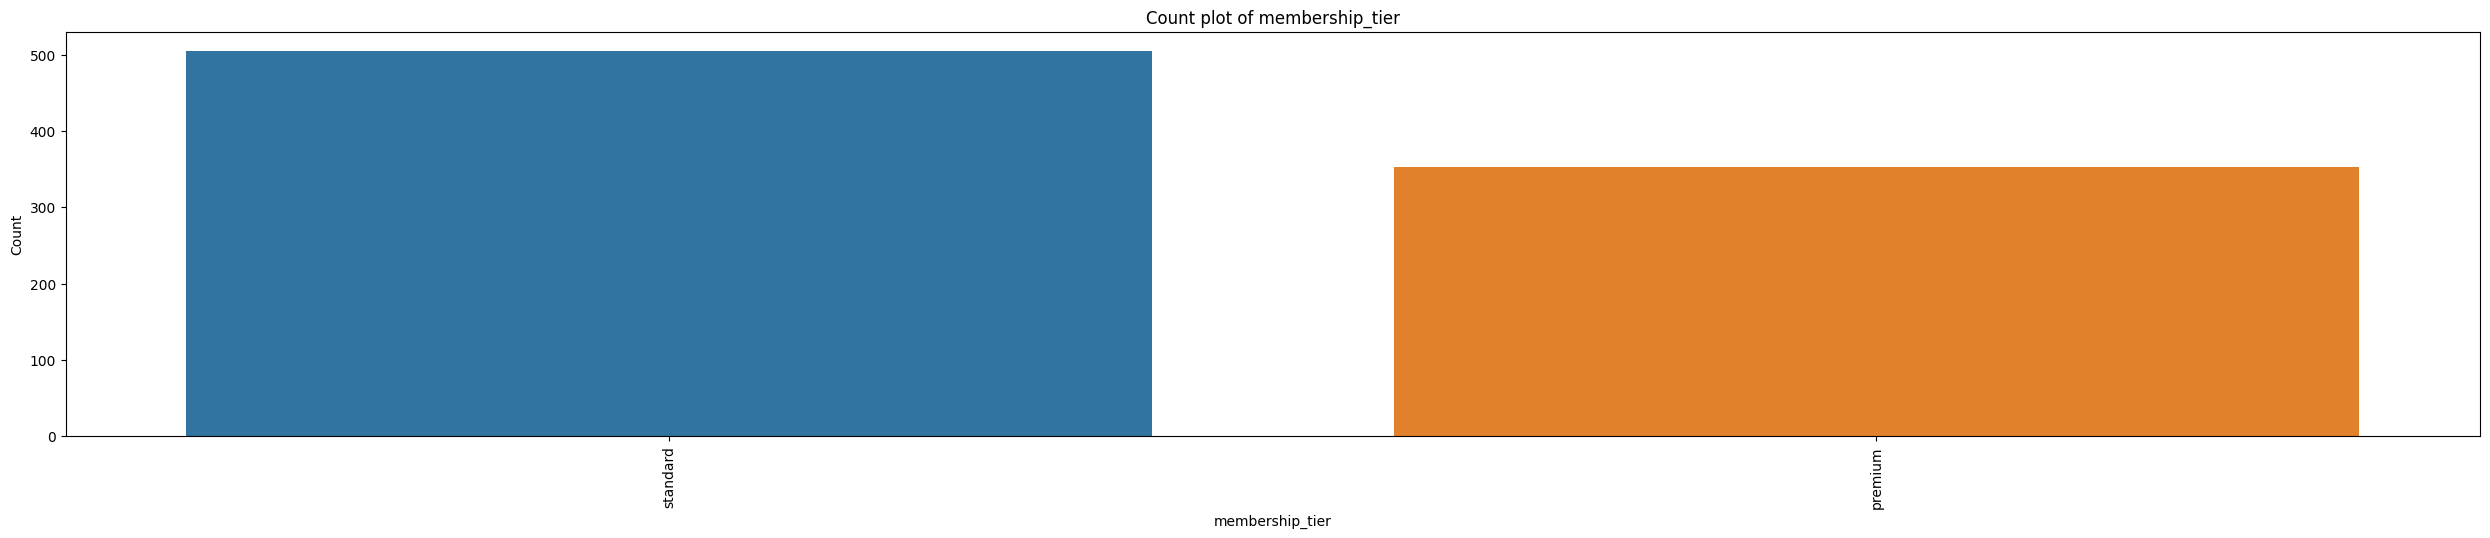

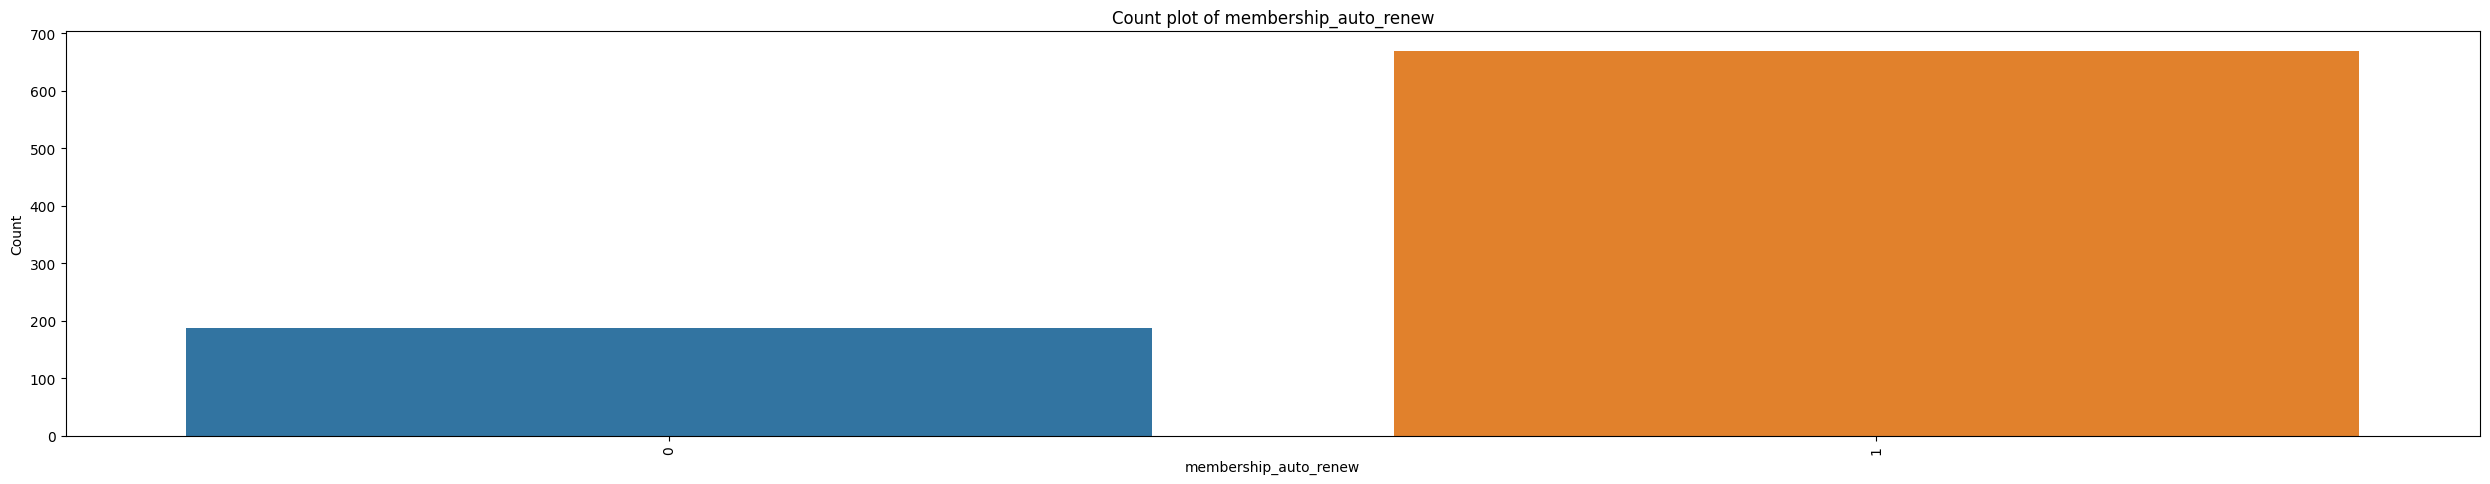

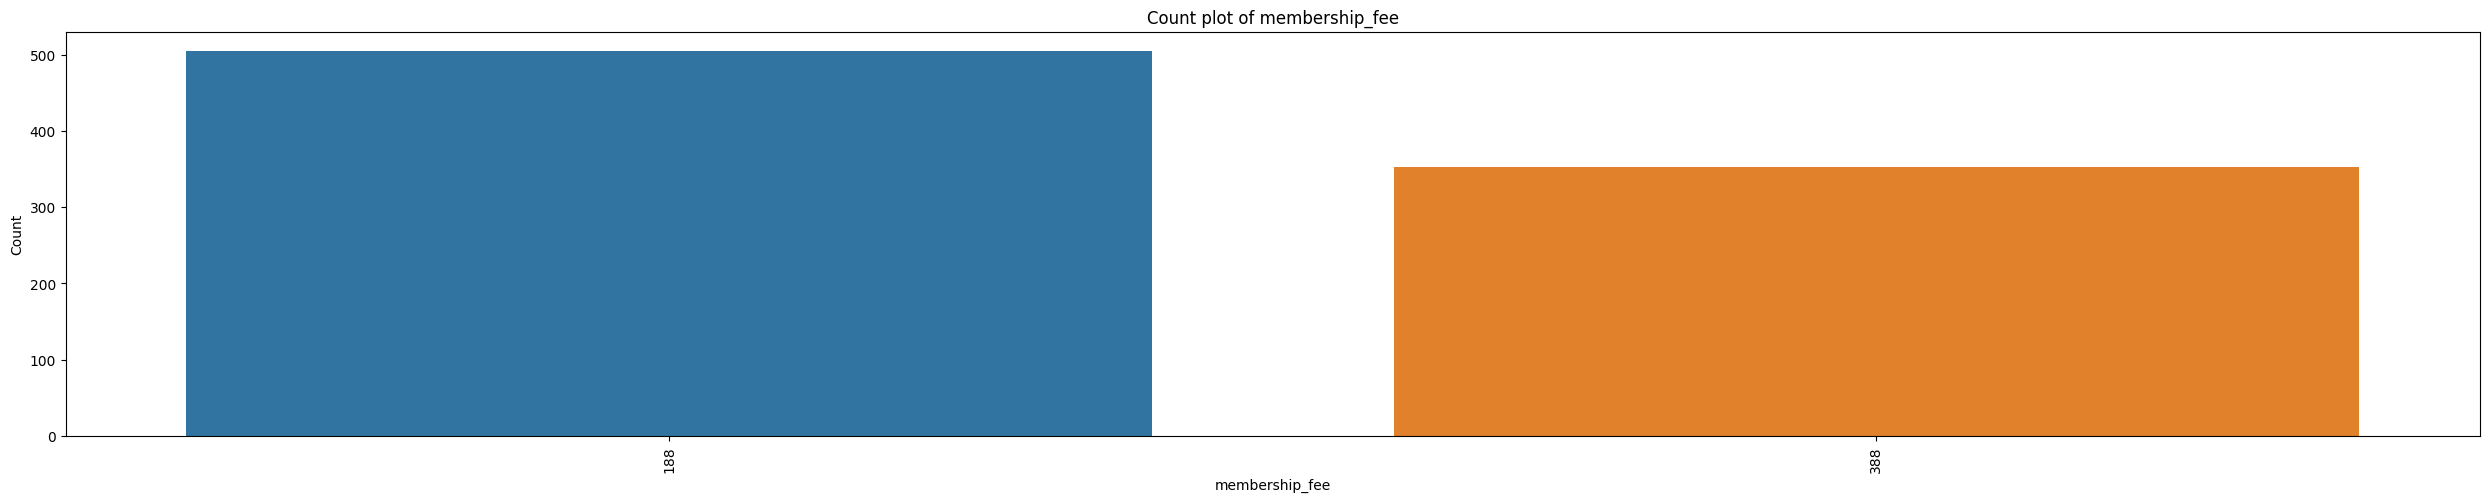

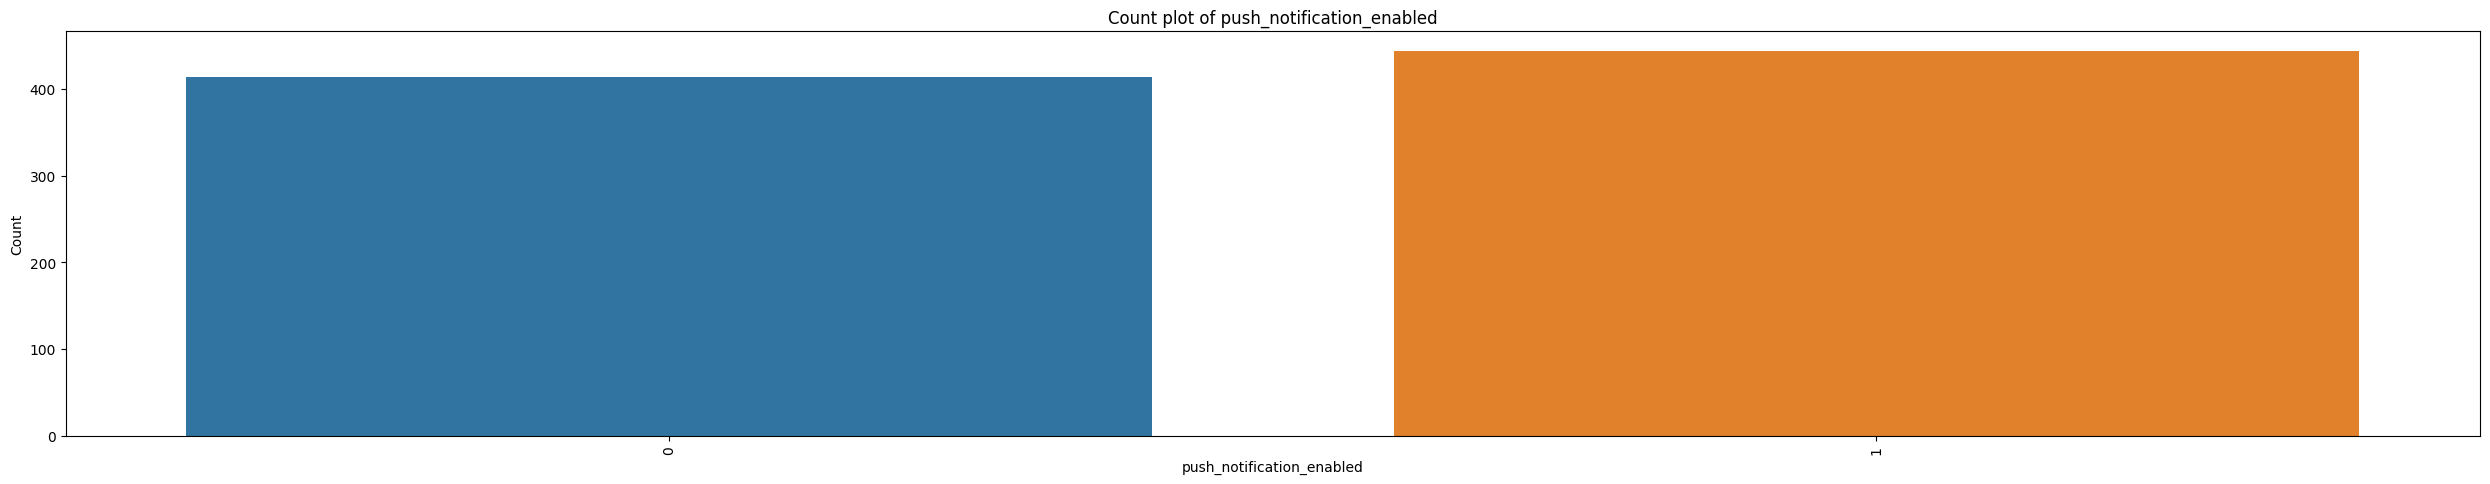

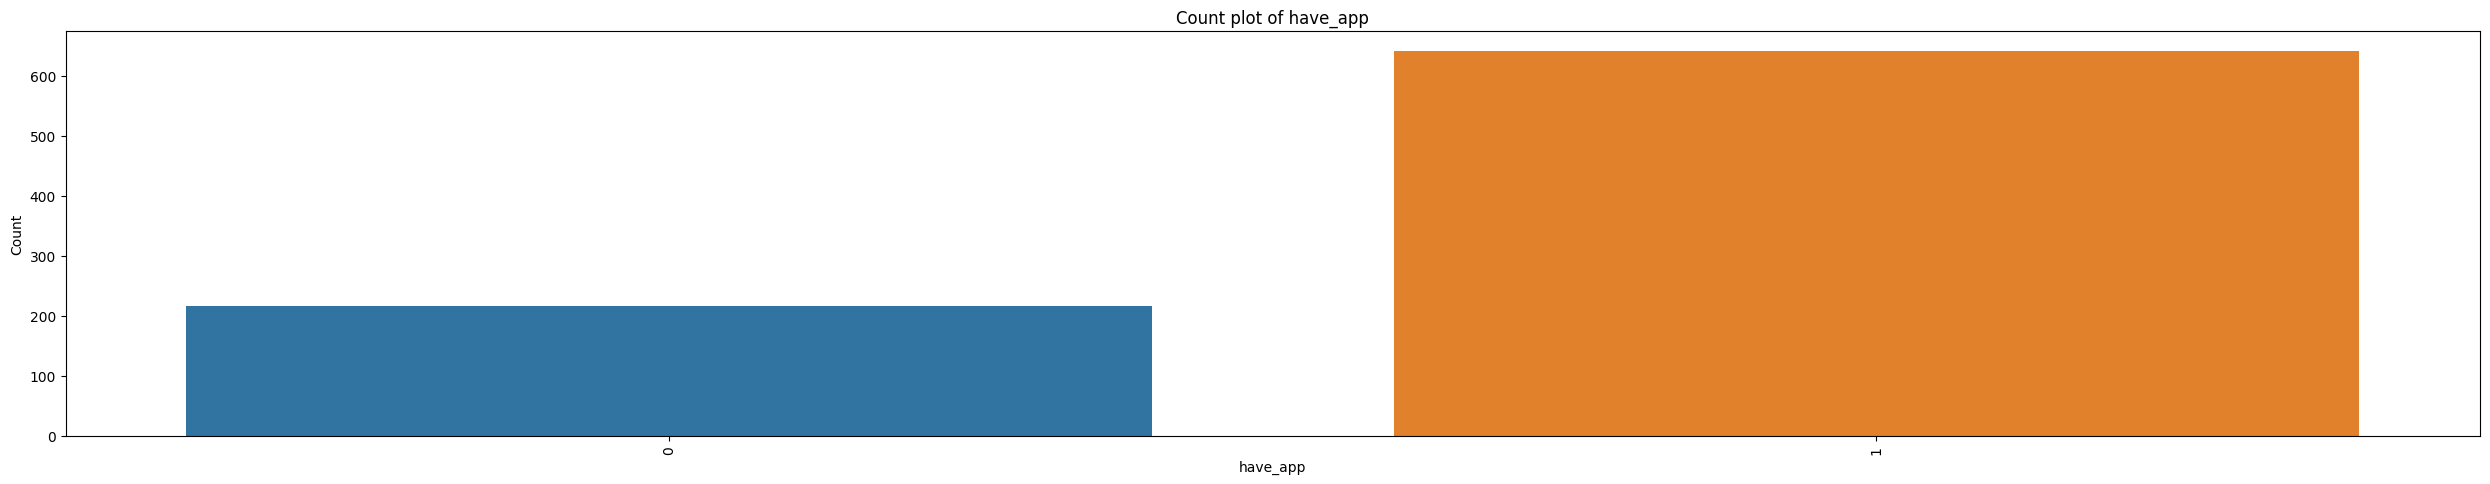

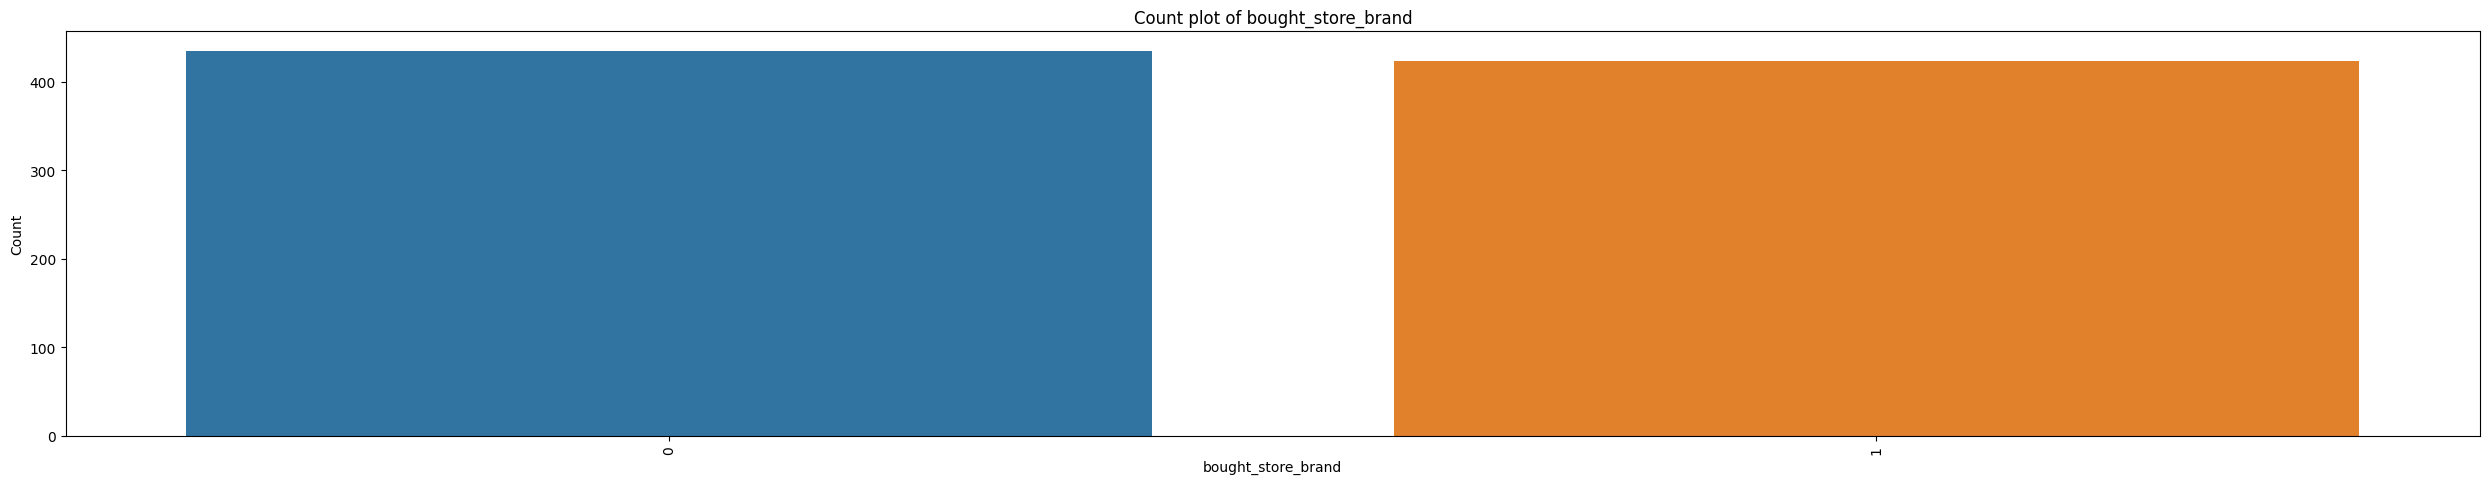

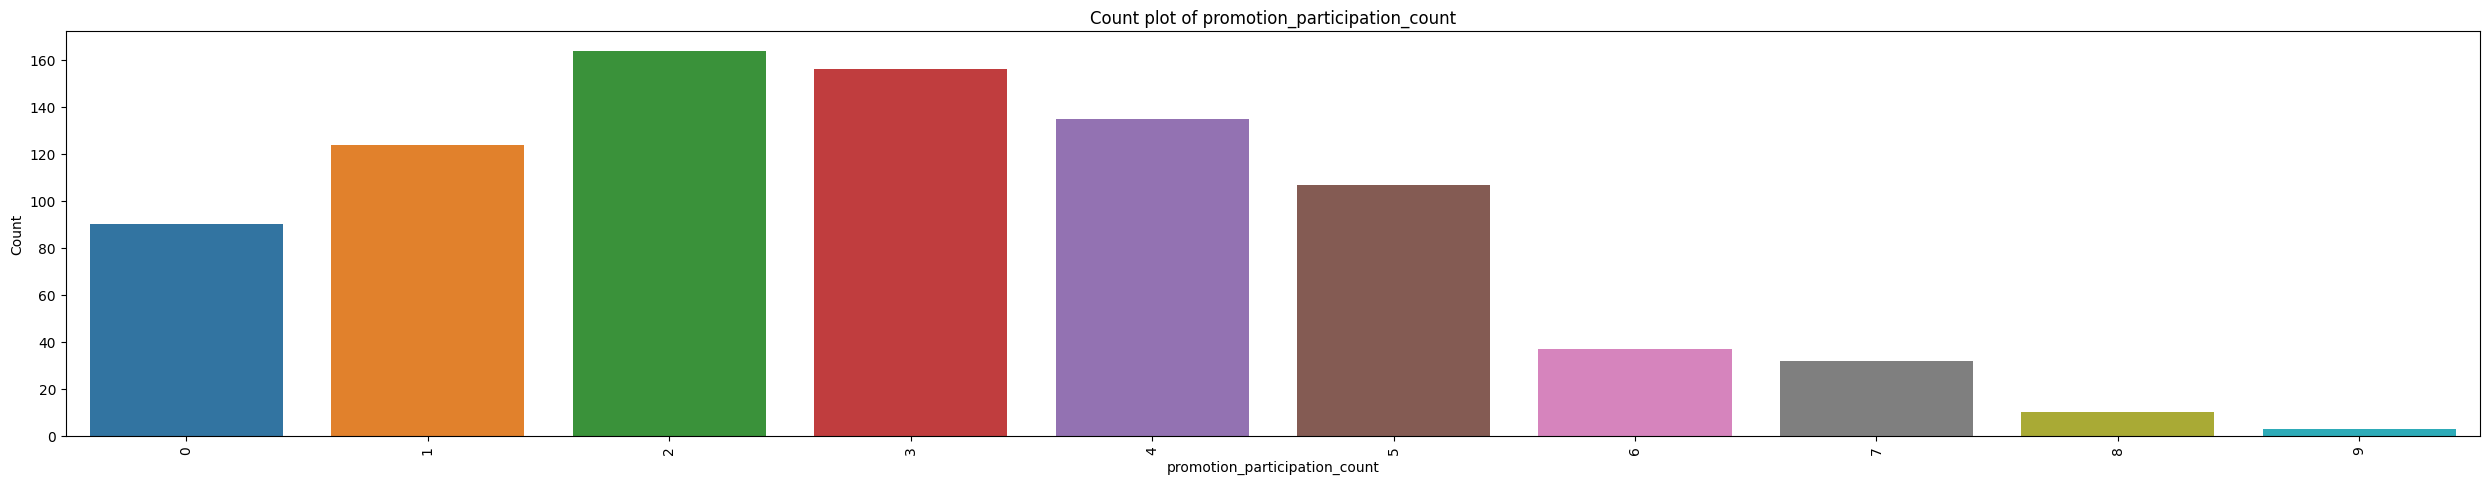

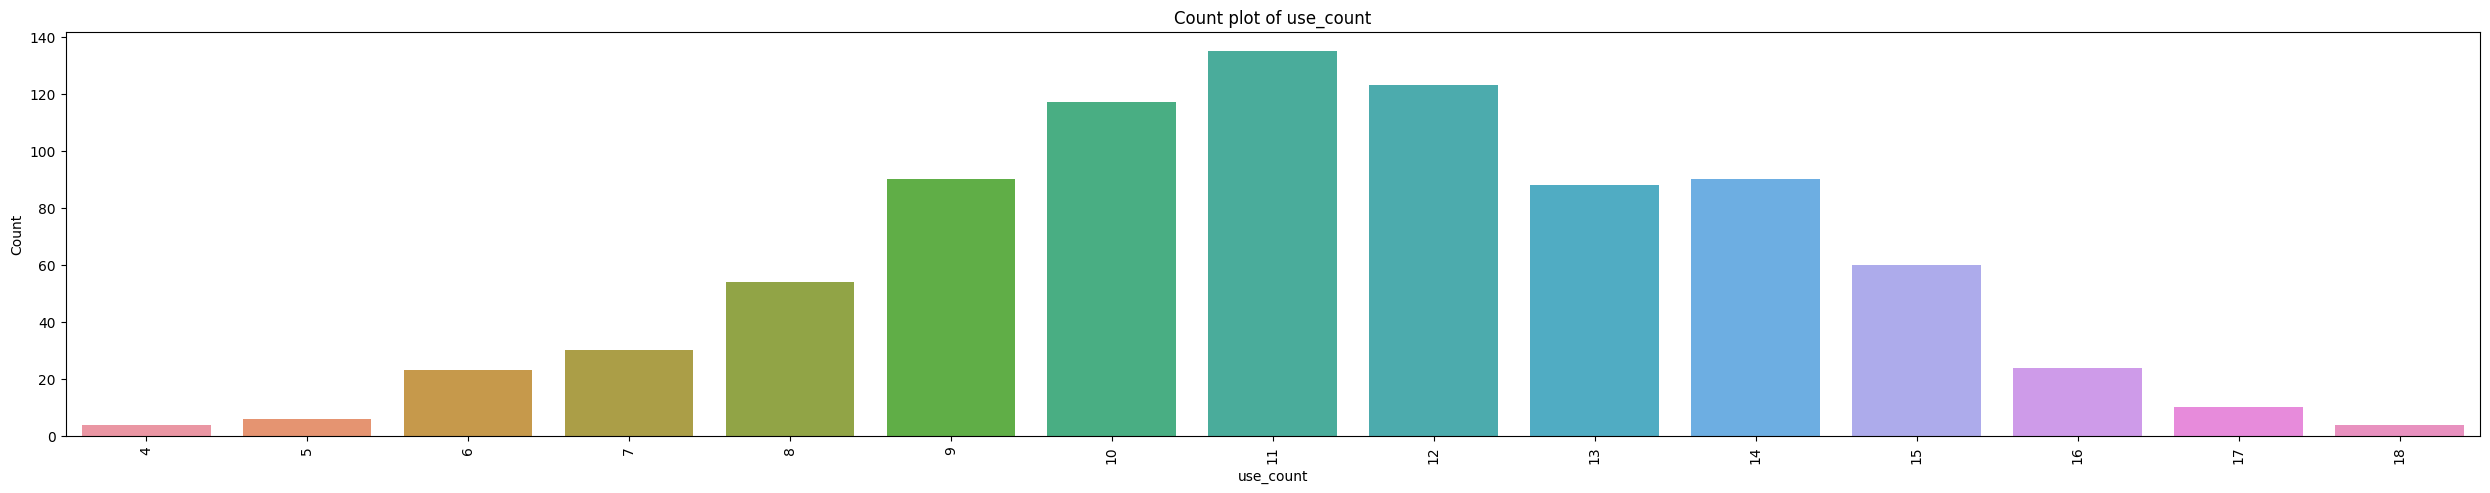

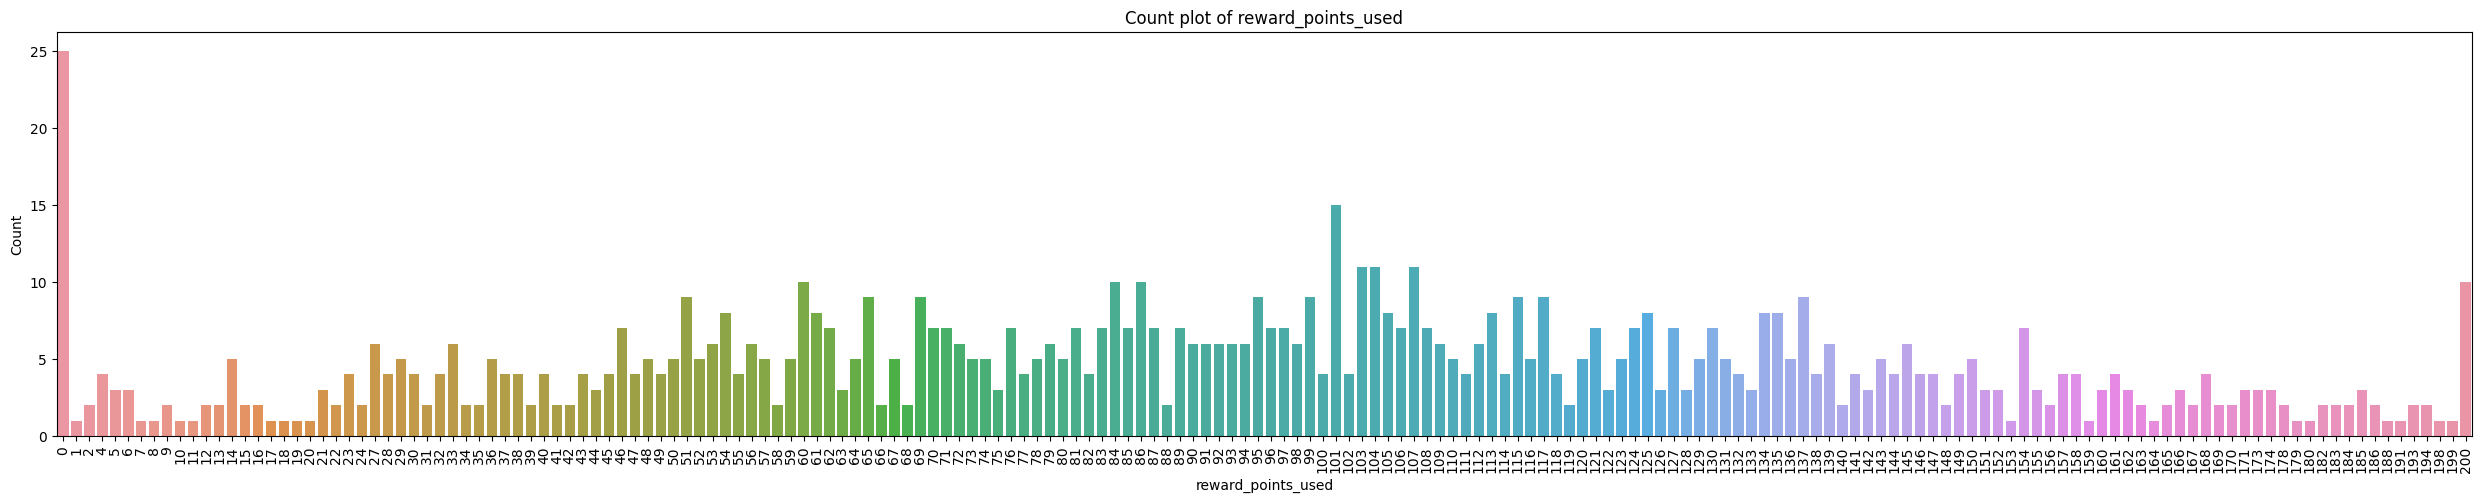

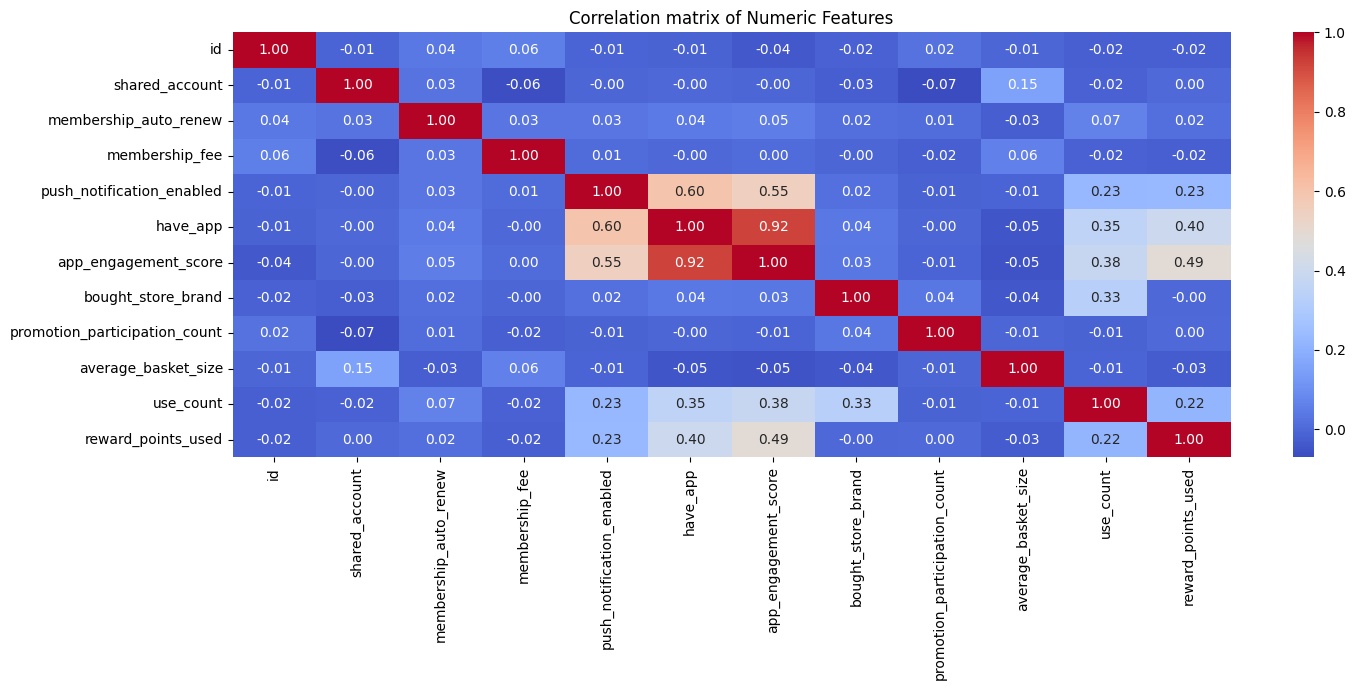

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation='vertical')
        plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,7))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot = True,cmap='coolwarm',fmt='.2f')
    plt.title('Correlation matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

In [10]:
df = df.drop(columns=['id','membership_start_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         858 non-null    object 
 1   shared_account                 858 non-null    int64  
 2   membership_tier                858 non-null    object 
 3   membership_auto_renew          858 non-null    int64  
 4   membership_fee                 858 non-null    int64  
 5   push_notification_enabled      858 non-null    int64  
 6   have_app                       858 non-null    int64  
 7   app_engagement_score           858 non-null    float64
 8   bought_store_brand             858 non-null    int64  
 9   promotion_participation_count  858 non-null    int64  
 10  average_basket_size            858 non-null    float64
 11  use_count                      858 non-null    int64  
 12  reward_points_used             858 non-null    int

In [11]:
df.columns

Index(['gender', 'shared_account', 'membership_tier', 'membership_auto_renew',
       'membership_fee', 'push_notification_enabled', 'have_app',
       'app_engagement_score', 'bought_store_brand',
       'promotion_participation_count', 'average_basket_size', 'use_count',
       'reward_points_used'],
      dtype='object')

# Preprocessing

In [12]:
feat  = ['gender','membership_tier']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
for column in feat:
    df[column] = le.fit_transform(df[column])

In [16]:
df

,gender,shared_account,membership_tier,membership_auto_renew,membership_fee,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
0,1,0,1,1,188,1,1,84.64,0,2,385.77,14,107
1,0,0,1,0,188,1,1,83.78,1,3,126.74,14,149
2,0,0,1,0,188,0,0,0.00,0,5,668.71,7,87
3,1,0,1,1,188,0,1,51.31,1,2,194.62,12,67
4,0,1,0,1,388,1,1,70.82,0,1,519.91,7,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,1,1,188,0,0,0.00,1,3,446.56,12,0
854,0,0,1,1,188,1,1,58.71,0,2,149.41,7,0
855,1,1,1,1,188,0,0,0.00,1,3,482.99,10,101
856,0,1,0,1,388,1,1,48.00,1,4,395.57,11,60


In [17]:
df = df.astype(int)

# Model Section

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score,
    log_loss, classification_report
)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.columns

Index(['gender', 'shared_account', 'membership_tier', 'membership_auto_renew',
       'membership_fee', 'push_notification_enabled', 'have_app',
       'app_engagement_score', 'bought_store_brand',
       'promotion_participation_count', 'average_basket_size', 'use_count',
       'reward_points_used'],
      dtype='object')

In [21]:
 X = df.drop(columns=['gender', 'shared_account', 'membership_tier', 'membership_auto_renew',
       'membership_fee', 'push_notification_enabled', 'have_app', 'bought_store_brand',
       'promotion_participation_count',
       'reward_points_used'])
# X = df.drop(columns=['reward_points_used'])
y = df['reward_points_used']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = dt.predict(X_test)

In [26]:
acc = accuracy_score(y_test,y_pred_dt)
acc*100


0.0

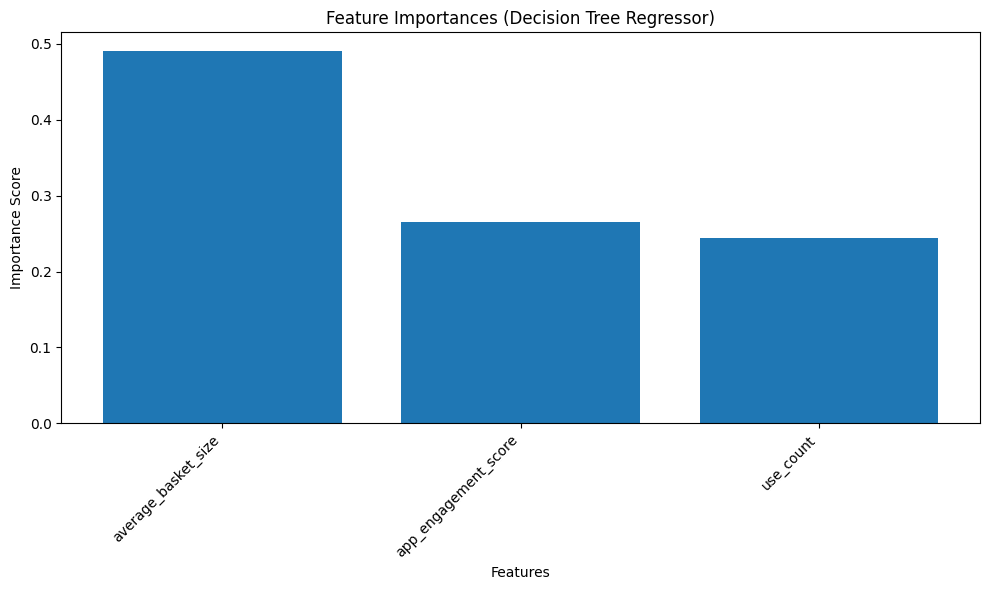

In [27]:
#Get feature importances
importances = dt.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1]
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45, ha='right')
plt.title("Feature Importances (Decision Tree Regressor)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [28]:
df  

,gender,shared_account,membership_tier,membership_auto_renew,membership_fee,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
0,1,0,1,1,188,1,1,84,0,2,385,14,107
1,0,0,1,0,188,1,1,83,1,3,126,14,149
2,0,0,1,0,188,0,0,0,0,5,668,7,87
3,1,0,1,1,188,0,1,51,1,2,194,12,67
4,0,1,0,1,388,1,1,70,0,1,519,7,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,1,1,188,0,0,0,1,3,446,12,0
854,0,0,1,1,188,1,1,58,0,2,149,7,0
855,1,1,1,1,188,0,0,0,1,3,482,10,101
856,0,1,0,1,388,1,1,48,1,4,395,11,60


# KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
lr = KNeighborsClassifier()


In [31]:
lr.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred_lr = lr.predict(X_test)

In [33]:
acc_lr = accuracy_score(y_test,y_pred_lr)
acc_lr*100

0.0

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred_rf = rf.predict(X_test)

In [37]:
acc_rf  = accuracy_score(y_test,y_pred_rf)
acc_rf*100

0.0

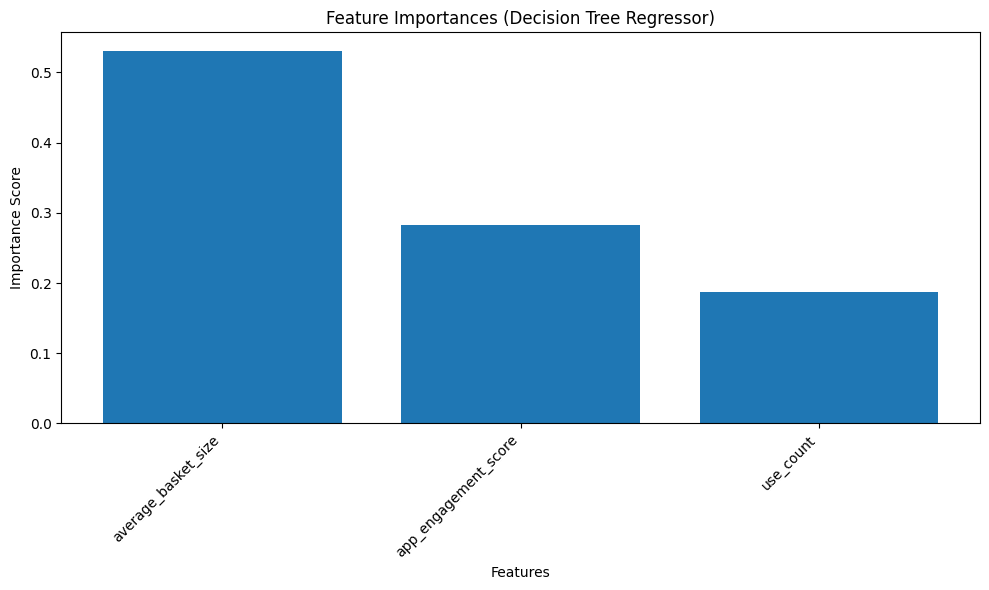

In [38]:
#Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1]
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45, ha='right')
plt.title("Feature Importances (Decision Tree Regressor)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()


In [40]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [41]:
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test,y_pred_gb)
acc_gb*100

0.0

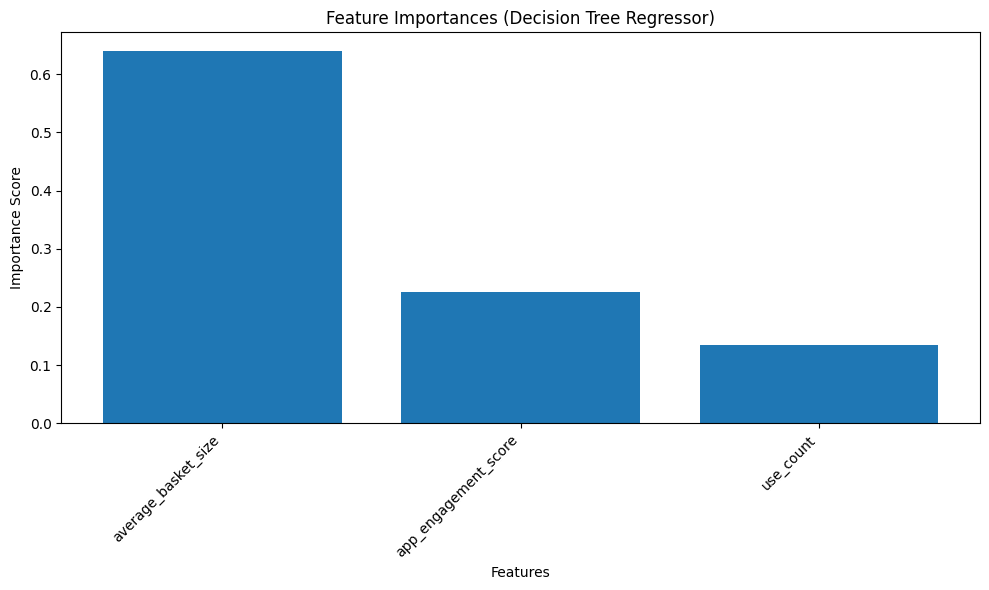

In [42]:
#Get feature importances
importances = gb.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1]
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45, ha='right')
plt.title("Feature Importances (Decision Tree Regressor)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [43]:
# Linear Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Trees and Ensembles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Support Vector Machine
from sklearn.svm import SVC

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# External Libraries (Install if not already installed)
# from xgboost import XGBClassifier             # pip install xgboost
# from lightgbm import LGBMClassifier           # pip install lightgbm
# from catboost import CatBoostClassifier       # pip install catboost


# LinearDiscriminantAnalysis

In [44]:
lda = LinearDiscriminantAnalysis()

In [45]:
lda.fit(X_train,y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test,y_pred_lda)
acc_lda*100

2.3255813953488373

# BernoulliNB

In [46]:
bnb = BernoulliNB()

In [47]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
acc_bnb = accuracy_score(y_test,y_pred_bnb)
acc_bnb*100

4.069767441860465

# MultinomialNB

In [48]:
mnb = MultinomialNB()

In [49]:
mnb.fit(X_train,y_train)
y_pred_mnb = lda.predict(X_test)
acc_mnb = accuracy_score(y_test,y_pred_mnb)
acc_mnb*100

2.3255813953488373

# GaussianNB

In [50]:
gnb = GaussianNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,y_pred_gnb)
acc_gnb*100

0.5813953488372093

# SVC

In [52]:
svm = SVC()

In [53]:
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_svm*100

3.488372093023256

# StackingClassifier

In [54]:
stc = StackingClassifier(estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf)
    ])

In [55]:
stc.fit(X_train,y_train)
y_pred_stc = stc.predict(X_test)
acc_stc = accuracy_score(y_test,y_pred_stc)
acc_stc*100

2.3255813953488373

# VotingClassifier

In [56]:
vot = VotingClassifier(estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf)
    ])

In [57]:
vot.fit(X_train,y_train)
y_pred_vot = lda.predict(X_test)
acc_vot = accuracy_score(y_test,y_pred_vot)
acc_vot*100

2.3255813953488373

# BaggingClassifier

In [58]:
bc = BaggingClassifier()

In [59]:
bc.fit(X_train,y_train)
y_pred_bc = lda.predict(X_test)
acc_bc = accuracy_score(y_test,y_pred_bc)
acc_bc*100

2.3255813953488373

# AdaBoostClassifier

In [60]:
adb = AdaBoostClassifier()

In [61]:
adb.fit(X_train,y_train)
y_pred_adb = lda.predict(X_test)
acc_adb = accuracy_score(y_test,y_pred_adb)
acc_adb*100

2.3255813953488373

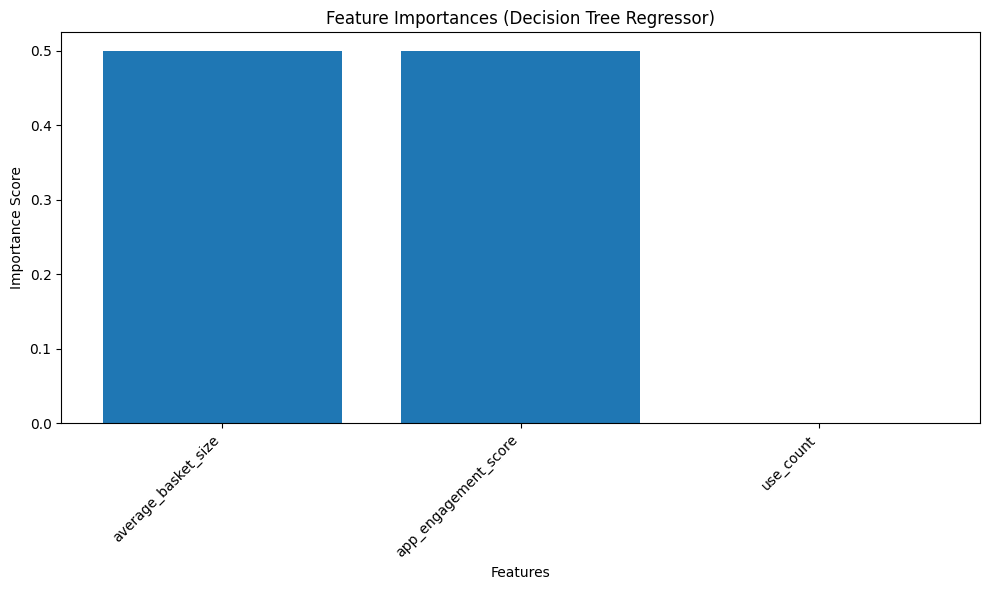

In [62]:
#Get feature importances
importances = adb.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1]
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45, ha='right')
plt.title("Feature Importances (Decision Tree Regressor)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# ExtraTreesClassifier

In [63]:
etc = ExtraTreesClassifier()

In [64]:
etc.fit(X_train,y_train)
y_pred_etc = etc.predict(X_test)
acc_etc = accuracy_score(y_test,y_pred_etc)
acc_etc*100

0.0

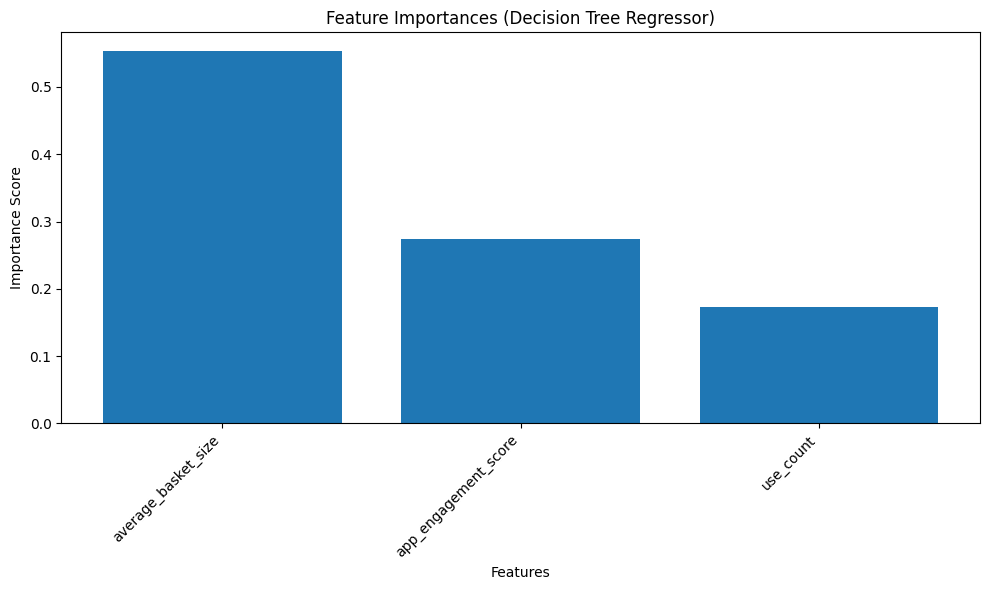

In [65]:
#Get feature importances
importances = etc.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1]
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45, ha='right')
plt.title("Feature Importances (Decision Tree Regressor)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# RidgeClassifier

In [66]:
rg = RidgeClassifier()

In [67]:
rg.fit(X_train,y_train)
y_pred_rg = lda.predict(X_test)
acc_rg = accuracy_score(y_test,y_pred_rg)
acc_rg*100

2.3255813953488373

# SGDClassifier

In [68]:
sdg = SGDClassifier()

In [69]:
sdg.fit(X_train,y_train)
y_pred_sdg = sdg.predict(X_test)
acc_sdg = accuracy_score(y_test,y_pred_sdg)
acc_sdg*100

1.1627906976744187

# PassiveAggressiveClassifier

In [70]:
pac = PassiveAggressiveClassifier()

In [71]:
pac.fit(X_train,y_train)
y_pred_pac = pac.predict(X_test)
acc_pac = accuracy_score(y_test,y_pred_pac)
acc_pac*100

0.5813953488372093

# KNeighborsClassifier

In [72]:
knc = KNeighborsClassifier()

In [73]:
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
acc_knc = accuracy_score(y_test,y_pred_knc)
acc_knc*100

0.0

# Conclusion :
> Need some feature engineering.